# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>
## <span style="color:blue">  Numerical exercises 8</span>


The variational principle in Quantum Mechanics states that the expectation value of the Hamiltonian over a (good) trial quantum state has the ground state energy $E_0$ as lower bound:

$$
\langle {\hat H} \rangle_T = 
\frac{\int dx \Psi^*_T(x) {\hat H} \Psi_T(x)}
{\int dx |\Psi_T(x)|^2} \ge E_0 =
\frac{\langle \Psi_0| {\hat H} | \Psi_0 \rangle}
{\langle \Psi_0 | \Psi_0 \rangle}
$$

During this exercise you will variationally optimize the ground state of a single quantum particle in a one dimensional (1D) space confined by the following external potential:
$$
V(x) = x^4 - \frac{5}{2}x^2
$$

This 1D quantum model is not analytically solvable and should be attacked by numerical methods. In order to obtain an approximate wave function for the ground state, the Variational Monte Carlo method uses a trial wave function, parametrized by a set of variational parameters. An approximate model for the ground state wave function is the following trial wave function:
$$
\Psi_T^{\sigma,\mu}(x) \propto e^{-\frac{(x-\mu)^2}{2\sigma^2}}+
                               e^{-\frac{(x+\mu)^2}{2\sigma^2}}
$$

$\Psi_T^{\sigma,\mu}(x)$ depends on <span style="color:red">two variational parameters: $\sigma$ and $\mu$</span>.

### Exercise 08.1

Write a Variational Monte Carlo code for a single quantum particle in 1D which exploits the Metropolis algorithm to sample the square modulus of our trial wave function $|\Psi_T^{\sigma,\mu}(x)|^2$ using an uniform transition probability $T(x_{new}|x_{old})$. By using data blocking, the code should be able to compute the expectation value for the Hamiltonian

$$
\langle {\hat H} \rangle_T = 
\frac{\int dx \Psi^*_T(x) {\hat H} \Psi_T(x)}
{\int dx |\Psi_T(x)|^2} = 
\int dx \frac{|\Psi_T(x)|^2}{\int dx |\Psi_T(x)|^2} \frac{{\hat H} \Psi_T(x)}{\Psi_T(x)}
$$

which can be used to find the parameters that minimize this quantity. Use $\hbar = 1$ and $m=1$.
<span style="color:red">Note that to measure $\langle {\hat H} \rangle_T$ you need the analytical calculation of:</span>
    
$$
\frac{{-\frac{\hbar^2}{2m}\frac{\partial^2}{\partial x^2}} \Psi_T^{\sigma,\mu}(x)}{\Psi_T^{\sigma,\mu}(x)}
$$

---

### Metodi Monte Carlo in meccanica quantistica

Si vuole utilizzare un metodo Monte-Carlo variazionale per la stima dell'energia di ground state di una particella quantistica in una dimensione. Per fare ciò si considera una funzione parametrica di trial $\Psi_T^{p_1,p_2..,p_N}(x)$ ragionevole che permetta di approssimare lo stato fondamentale e, in seguito, di ricavare il valore di aspettazione dell'energia corrispondente. Un buon modello per la funzione d'onda dello stato fondamentale è la seguente funzione d'onda di prova:

$$ \Psi_T^{\sigma,\mu}(x) \propto e^{-\frac{(x-\mu)^2}{2\sigma^2}}+e^{-\frac{(x+\mu)^2}{2\sigma^2}}\,\,,$$

dove $\sigma$ e $\pm\mu$ rappresentano rispettivamente la radice della varianza e la media di due gaussiane parzialmente sovrapposte.

La funzione precedente può essere una buona approssimazione di $\Psi_0(x)$ in quanto è una funzione simmetrica (dato che $V(x)$ è una funzione pari) e presenta due massimi (il potenziale $V(x)$ è caratterizzato da due minimi speculari). Si sta trascurando il fattore di normalizzazione in quanto viene eliminato in seguito nel calcolo.

Si può dunque stimare il valore atteso dell'hamiltoniana del sistema, determinato da

$$
\langle {\hat H} \rangle_T = 
\frac{\int dx \Psi^*_T(x) {\hat H} \Psi_T(x)}
{\int dx |\Psi_T(x)|^2} = 
\int dx \frac{|\Psi_T(x)|^2}{\int dx |\Psi_T(x)|^2} \frac{{\hat H} \Psi_T(x)}{\Psi_T(x)}\,\,,
$$

per cui 

$$ \frac{{\hat H} \Psi_T(x)}{\Psi_T(x)} = \frac{\big({-\frac{1}{2}\frac{\partial^2}{\partial x^2}+V(x)}\big) \Psi_T^{\sigma,\mu}(x)}{\Psi_T^{\sigma,\mu}(x)} = -\frac{1}{2\sigma^4}\cdot\bigg[x^2+\mu^2-\sigma^2-2x\mu\tanh\bigg(\frac{x\mu}{\sigma^2}\bigg)\bigg]+x^4-\frac{5}{2}x^2$$

è la quantità che rappresenta l'energia totale della particella, che è la quantità che si vuole minimizzare, mentre

$$ \frac{|\Psi_T^{\sigma,\mu}(x)|^2}{\int dx |\Psi_T^{\sigma,\mu}(x)|^2}$$

è la distribuzione da cui si vogliono campionare tali valori.

Dunque quello che si vuole fare è implementare un algoritmo di Metropolis per cui si possano campionare variabili casuali dalla distribuzione precedente, in cui si può trascurare il termine a denominatore, essendo questo un termine di normalizzazione.

Si considerano quindi le variabili di trial $(\mu_0,\sigma_0)$ di partenza, per poi campionare $N$ variabili casuali della distribuzione $|\Psi_T^{\mu_0,\sigma_0}(x)|^2$. Dunque è possibile quindi valutare una stima dell'energia $E_T^{\mu_0,\sigma_0}$ con la sua relativa incertezza, calcolando la media e la deviazione standard della media degli N termini

$$ \frac{{\hat H} \Psi_T(x_i)}{\Psi_T(x_i)}\,\,,$$

dove $\{x_1,x_2,...,x_N\}$ sono le $N$ variabili aleatorie campionate dalla distribuzione nel singolo blocco.

Per stimare dunque il primo valore dell'energia $E(\mu_0,\sigma_0)$, si scelgono arbitrariamente i parametri di trial $\mu_0,\sigma_0$, e un passo massimo dell'algoritmo $\delta$: così facendo si arriva ad un primo valore dell'energia pari a $E(\mu_0,\sigma_0) \geq E_0$.

---

### Exercise 08.2

To find the parameters $\sigma$ and $\mu$ which minimize $\langle {\hat H} \rangle_T$, extend your Variational Monte Carlo code to face the variational optimization problem via a <span style="color:red">Simulated Annealing (SA) algorithm</span>.

Choose an appropriate starting temperature for your SA algorithm and an appropriate temperature-update-law to make the optimization work.

Compute $\langle {\hat H} \rangle_T$ with enough statistics in order to be able to measure the lowering of $\langle {\hat H} \rangle_T$ once the variational parameters are moved.

- <span style="color:red">Show a picture of $\langle {\hat H} \rangle_T$ (with statistical uncertainties) as a function of the SA steps of the algorithm</span>
- you could also show a picture of the trajectory of the SA algorithm in the variational parameter space as a function of the SA steps
- <span style="color:red">show a picture of the estimation of $\langle {\hat H} \rangle_T$ </span> and its statistical uncertainty as a function of the number of blocks/MC steps <span style="color:red">for the set of parameters which minimize $\langle {\hat H} \rangle_T$</span>
- <span style="color:red">show also a picture **of the sampled** $|\Psi_T(x)|^2$</span> by filling a histogram with the sampled configurations, moreover compare it with the analytic curve of $|\Psi_T(x)|^2$ and with the numerical solution obtained by transforming the Schrodinger equation into a matrix equation (see below the supplementary material).

---

### Algoritmo di Simulated Annealing

Una volta che è stata stimata l'energia della particella $E(\mu_0,\sigma_0)$ a partire dai valori iniziali delle variabili di trial $(\mu_0,\sigma_0)$, per cercare nuove variabili di trial $(\mu,\sigma)$ in modo da minimizzare l'energia, si può utilizzare il metodo del Simulated Annealing. Ovvero si associa alle variabili iniziali una "temperatura" $T$, in modo tale che le nuove variabili di trial possano essere scelte casualmente tramite

$$\mu = \mu_0+\Delta\mathcal{U}\,\,,\,\,\sigma = \sigma_0+\Delta\mathcal{U},\,\,\,\,\text{dove}\,\,\mathcal{U}\in [-1,1]\,\,,\text{e}\,\,\Delta = 0.01\,\,,$$

per cui si possa valutare la nuova energia $E_T^{\mu,\sigma}$, per cui la probabilità di accettazione della mossa è

$$A(\mu,\sigma|\mu_0,\sigma_0) = \min\Big[1, e^{-\beta\big(E(\mu,\sigma)-E(\mu_0,\sigma_0)\big)}\Big]\,\,.$$

In particolare in questo caso è stata fissata una temperatura iniziale $T_0 = 10$, per cui ogni temperatura sono effettuati dieci iterazioni dell'algoritmo di Metropolis, per cui se la singola mossa viene accettata vengono salvate le nuove variabili di trial $\mu,\sigma$. Dopo ogni dieci iterazioni la temperatura viene abbassata moltiplicandola per il fattore di raffreddamento $\alpha=0.9$.

Di seguito si hanno il grafico della media e della deviazione standard del valore atteso dell'hamiltoniana del sistema in funzione del numero di iterazioni totali dell'algoritmo di Simulated Annealing, e il grafico dell'evoluzione dei parametri di trial $\mu,\sigma$.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

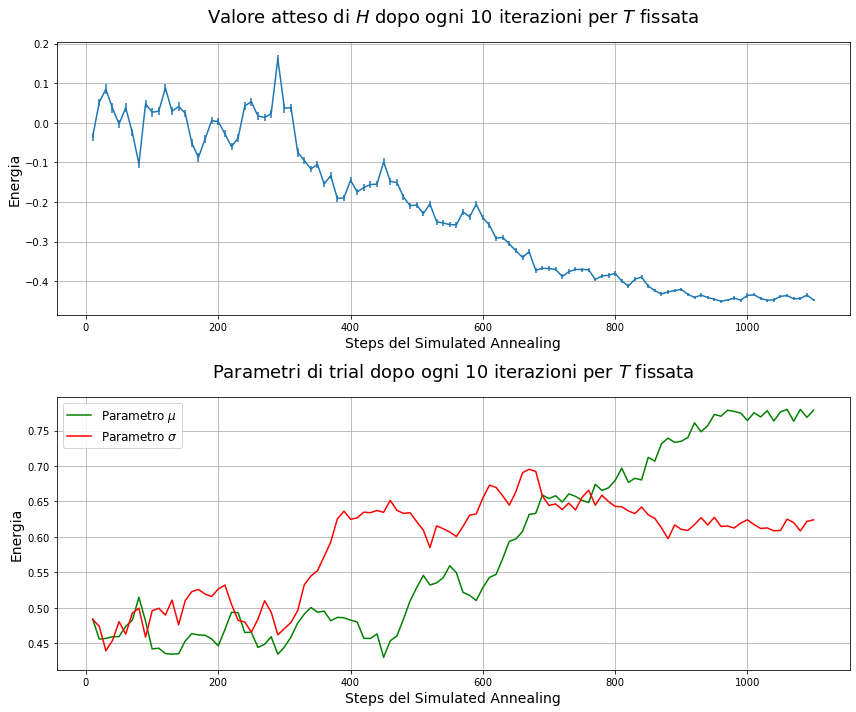

In [2]:
data_res = np.loadtxt('output_results.dat')

steps = data_res[:, 0]
E_s = data_res[:, 1]
err_E_s = data_res[:, 2]
mu = data_res[:, 3]
sigma = data_res[:, 4]

plt.figure(figsize=(12,10))

plt.subplot(2,1,1)
plt.title("Valore atteso di $H$ dopo ogni 10 iterazioni per $T$ fissata",fontsize=18,pad=20)
plt.errorbar(steps, E_s, yerr=err_E_s)
# plt.axhline(y=0, color='red', linestyle='--', label='Differenza attesa')
plt.ylabel('Energia',fontsize=14)
plt.xlabel("Steps del Simulated Annealing",fontsize=14)
plt.grid(True)

plt.subplot(2,1,2)
plt.title("Parametri di trial dopo ogni 10 iterazioni per $T$ fissata",fontsize=18,pad=20)
plt.plot(steps, mu, label='Parametro $\mu$', color = 'green')
plt.plot(steps, sigma, label='Parametro $\sigma$', color = 'red')
# plt.axhline(y=0, color='red', linestyle='--', label='Differenza attesa')
plt.ylabel('Energia',fontsize=14)
plt.xlabel("Steps del Simulated Annealing",fontsize=14)
plt.grid(True)

plt.tight_layout()

plt.legend(fontsize=12)
plt.show()

Osservando la densità di probabilità associata alla funzione d'onda $\Psi_0$, è stata sempre scelta come coordinata iniziale per ogni implementazione dell'algoritmo di Metropolis $x_0=0$, poichè si trova fra due massimi di probabilità, e uno step massimo dell'algoritmo $\delta\simeq 1$.
Scegliendo i parametri di trial $\mu_0,\sigma_0$ e lo step massimo $\delta$ si è cercato di mantenere il rate di accettazione dell'algoritmo non troppo distante dal $50\%\,$: sono stati scelti i parametri $\mu_0,\sigma_0=0,5$ e $\delta=1.2$ poichè parametri che minimizzano di più l'energia attraverso l'algoritmo di Simulated Annealing, e mantengono un rate di accettazione del $60\%$ circa.

Una volta trovati i parametri $\mu^\star = 0.771199\,,\,\,\sigma^\star = 0.617621$ che minimizzano l'energia, mediante il metodo del Data Blocking è possibile calcolare tale valore dell'energia. Di seguito si ha il grafico della media prograssiva di tale grandezza con la sua deviazione standard progressiva, calcolata per $N=100$ blocchi di taglia $L=1000$.

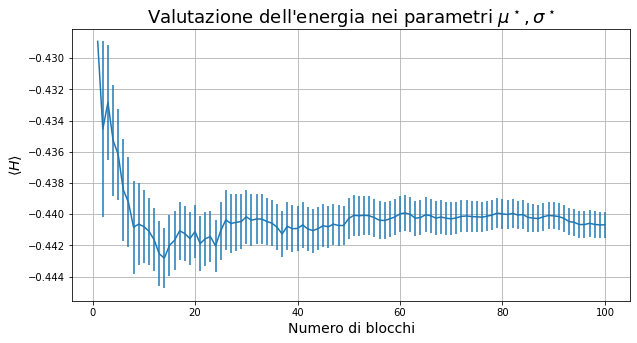

E(μ*,σ*) = -0.44068 ± 0.000835767


In [3]:
data_db = np.loadtxt('output_db.dat')

blocks = data_db[:, 0]
E = data_db[:, 1]
E_err = data_db[:, 2]

plt.figure(figsize=(10,5))

plt.title("Valutazione dell'energia nei parametri $\mu^\star,\sigma^\star$",fontsize=18)
plt.errorbar(blocks, E, yerr=E_err)
# plt.hlines(-0.46046,0,100, color='red', linestyle='-', label="Theoric expected value", linewidth=2, alpha=0.5)
plt.ylabel(r'$ \langle {H} \rangle  $',fontsize=14)
plt.xlabel("Numero di blocchi",fontsize=14)
plt.grid(True)

plt.show()


ultimo_valore_E = E[-1]
ultimo_valore_E_err = E_err[-1]

equazione = f"E(\u03BC*,\u03C3*) = {ultimo_valore_E} \u00B1 {ultimo_valore_E_err}"
print(equazione)

In questo modo si osserva come facendo evolvere l'algoritmo di Simulated Annealing, e calcolando l'energia $E(\mu^\star,\sigma^\star)$ mediante il metodo del Data Blocking, si arriva all'energia minimizzata

$$E(\mu,\sigma) = -0.44068 \pm 0.000835767\,\,,\,\,\text{dove}\,\,\mu^\star = 0.771199\,\,,\,\,\sigma^\star = 0.617621\,.$$

Si nota come non c'è compatibilità con l'energia ottenuta con il metodo del Data Blocking con l'energia del ground state teorico $E_0\simeq -0.46$. Ciò può essere dovuto alla scelta non ottimale della famiglia di funzioni parametriche da ottimizzare.

---

### Evoluzione dei parametri nel Simulated Annealing

Ora, di seguito si ha una rappresentazione grafica dell'evoluzione del valore atteso dell'energia del sistema, considerando le variazioni dei parametri di trial $\mu,\sigma$ accettate mediante l'algoritmo di Simulated Annealing.

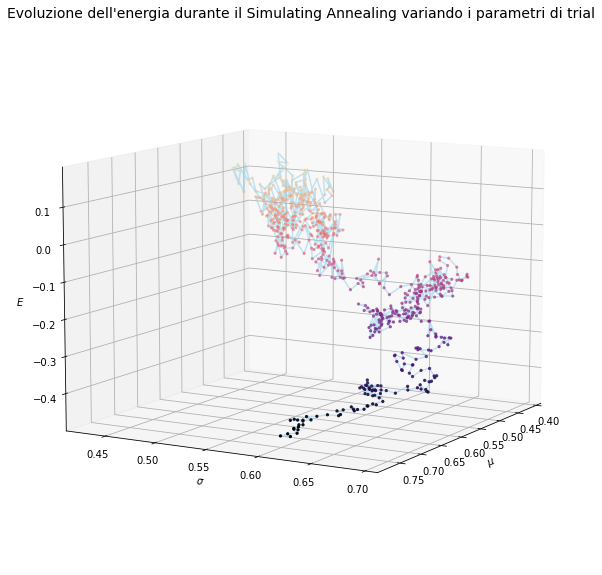

In [4]:
from mpl_toolkits.mplot3d import Axes3D

data_des = np.loadtxt('output_descend.dat')

mu = data_des[:, 1]  # Asse delle x
sigma = data_des[:, 2]  # Asse delle y
E = data_des[:, 0]  # Asse delle z (prima colonna)

# Creo una figura 3D
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111, projection='3d')

ax.plot(mu, sigma, E, color='skyblue', alpha=0.5)
ax.scatter(mu, sigma, E, c=E, marker='.', cmap='magma')

plt.title('Evoluzione dell\'energia durante il Simulating Annealing variando i parametri di trial', fontsize=14)
ax.set_xlabel('$\mu$')
ax.set_ylabel('$\sigma$')
ax.set_zlabel('$E$')
ax.view_init(10, 30)

# Mostra il grafico
plt.show()

---

### Confronto fra le distribuzioni di probabilità

Si vuole ora confrontare la distribuzione di probabilità del ground state $|\Psi_0|^2$ esatta con il risultato della simulazione.
Il problema in esame non è analiticamente risolubile in modo diretto, ma si può risolvere l'equazione di Schrodinger indipendente dal tempo in un modo alternativo.
Si può discretizzare lo spazio 1D e rendere la funzione d'onda un vettore, le cui componenti sono i valori che assume su un reticolo di punti posti molto vicini tra loro.
A questo punto l'equazione di Schrodinger diventa un'equazione matriciale e risolverla significa trovare gli autostati e gli autovalori della matrice.
Si vuole dunque confrontare la distribuzione di probabilità ottenuta dall'algoritmo di Metropolis utilizzando i parametri di trial $\mu^\star,\sigma^\star$ con quella derivata dalla risoluzione del problema discreto agli autovalori.

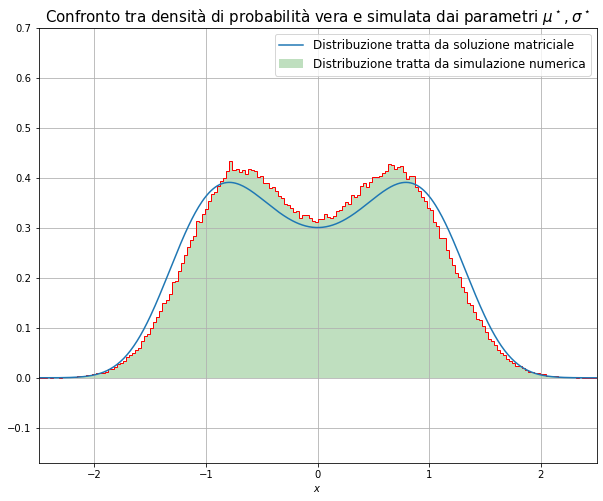

In [5]:
hist = np.loadtxt('distribution.dat')

def Vpot(x):
    return (x**2 - 2.5)*x**2
    #return 0.5*x**2

hbar = 1
m = 1
a = 10
N = 1000 # number of iterations

# Step sizes
x = np.linspace(-a/2, a/2, N)
dx = x[1] - x[0] # the step size
V = Vpot(x)

CDiff = np.diag(np.ones(N-1),-1)-2*np.diag(np.ones(N),0)+np.diag(np.ones(N-1),1)

# Hamiltonian matrix
H = (-(hbar**2)*CDiff)/(2*m*dx**2) + np.diag(V)

# Compute eigenvectors and their eigenvalues
E,psi = np.linalg.eigh(H)

# Take the transpose & normalize
psi = np.transpose(psi)
psi = psi/np.sqrt(dx)

# Plot a few things
plt.figure(figsize=(10,8))
scale = 0.3
plt.plot(x,(psi[0])**2, label='Distribuzione tratta da soluzione matriciale')
# plt.hist(hist,bins=200, color='gold', alpha=0.7, density=True, label='VMC simulation')
plt.hist(hist,bins=200, color='green', alpha=0.25, density=True, label='Distribuzione tratta da simulazione numerica',histtype='stepfilled')
plt.hist(hist,bins=200, color='red', alpha=1, density=True, histtype='step')
plt.title("Confronto tra densità di probabilità vera e simulata dai parametri $\mu^\star,\sigma^\star$", fontsize=15)
plt.xlabel("$x$")
plt.grid(True)
plt.xlim((-2.5,2.5))
plt.ylim((-0.17,0.7))


plt.legend(fontsize=12)
plt.show()

Si osserva come la compatibilità tra il risultato variazionale e quello teorico non è soddisfacente, come anticipato dall'osservazione dell'energia.
D'altra parte però, questa funzione rappresenta la miglior stima dello stato di ground state che si può ottenere in base alla famiglia di funzioni di trial scelta. Dunque l'unico modo per migliorare questo risultato sembra essere quello di trovare una famiglia di funzioni più adeguata al problema di interesse.

---

### <span style="color:green">Supplementary material</span>

How can we describe a wave function as a vector? We set up a lattice of discrete points, spaced by a constant distance $dx$, and record the value of the function at each lattice point. In this way the wave function, $\Psi(x)$ become a vector:

$$
\Psi(x) \to \left[ \Psi(x_1), \Psi(x_2), ..., \Psi(x_N) \right] = 
\left[ \Psi_1, \Psi_2, ..., \Psi_N \right]
$$

The time independent Schrodinger equation 

$$
{\hat H} \Psi(x) = \left( -\frac{\hbar^2}{2m}\frac{\partial^2}{\partial x^2} + V(x) \right) \Psi(x) = E \Psi(x)
$$

can be written in matrix form. But how do we write the second derivative at a particular point? Let's start with the first derivatives:
$$
\frac{\partial}{\partial x} \Psi\left(x=(x_i+x_{i+1})/2\right) \simeq \frac{\Psi_{i+1}-\Psi_{i}}{dx}\\
\frac{\partial}{\partial x} \Psi\left(x=(x_i+x_{i-1})/2\right) \simeq \frac{\Psi_{i}-\Psi_{i-1}}{dx}
$$

Thus, we can discretize the second derivative in the following way:
$$
\frac{\partial^2}{\partial x^2} \Psi(x=x_i) =
\frac{\frac{\partial}{\partial x} \Psi\left(x=(x_i+x_{i+1})/2\right) - \frac{\partial}{\partial x} \Psi\left(x=(x_i+x_{i-1})/2\right)}{dx} =
\frac{\Psi_{i+1}-2\Psi_{i}+\Psi_{i-1}}{dx^2}
$$

We finally obtain:

$$
\begin{bmatrix}
 \frac{\hbar^2}{m\,dx^2}+V(x_1)& -\frac{\hbar^2}{2m\,dx^2} & 0 & \dots  & 0 \\
-\frac{\hbar^2}{2m\,dx^2} & \frac{\hbar^2}{m\,dx^2}+V(x_2) & -\frac{\hbar^2}{2m\,dx^2} & \dots  & 0 \\
 0                        & -\frac{\hbar^2}{2m\,dx^2} & \frac{\hbar^2}{m\,dx^2}+V(x_3) & \dots  & 0 \\
 \vdots                   & \vdots                    & \vdots & \ddots & \vdots \\
 0                    & 0                & 0 & \dots  & \frac{\hbar^2}{m\,dx^2}+V(x_N)
\end{bmatrix}
\begin{bmatrix}
\Psi_{1} \\
\Psi_{2} \\
\vdots \\
\Psi_{N}
\end{bmatrix}
= E
\begin{bmatrix}
\Psi_{1} \\
\Psi_{2} \\
\vdots \\
\Psi_{N}
\end{bmatrix}
$$

To solve the time independent Schrodinger equation we therefore have to find eigenstates and eigenvalues of the matrix just obtained.

Ground state energy:  -0.46046587969271513
1st excited state energy:  0.0974247133176109
2nd excited state energy:  1.9717331343930213


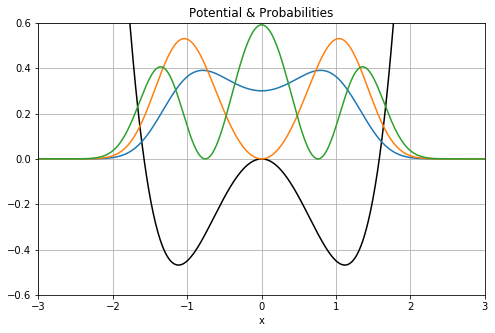

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def Vpot(x):
    return (x**2 - 2.5)*x**2
    #return 0.5*x**2

hbar = 1
m = 1
a = 10
N = 1000 # number of iterations

# Step sizes
x = np.linspace(-a/2, a/2, N)
dx = x[1] - x[0] # the step size
V = Vpot(x)

# The central differences method: f" = (f_1 - 2*f_0 + f_-1)/dx^2

CDiff = np.diag(np.ones(N-1),-1)-2*np.diag(np.ones(N),0)+np.diag(np.ones(N-1),1)
# np.diag(np.array,k) construct a "diagonal" matrix using the np.array
# The default is k=0. Use k>0 for diagonals above the main diagonal, 
# and k<0 for diagonals below the main diagonal

# Hamiltonian matrix
H = (-(hbar**2)*CDiff)/(2*m*dx**2) + np.diag(V)

# Compute eigenvectors and their eigenvalues
E,psi = np.linalg.eigh(H)

# Take the transpose & normalize
psi = np.transpose(psi)
psi = psi/np.sqrt(dx)

print("Ground state energy: ", E[0])
print("1st excited state energy: ", E[1])
print("2nd excited state energy: ", E[2])

# Plot a few things
plt.figure(figsize=(8,5))
scale = 0.3
plt.plot(x, scale*V, color="Black", label="Potential") # plot the potential
plt.plot(x,(psi[0])**2)
plt.plot(x,(psi[1])**2)
plt.plot(x,(psi[2])**2)
plt.title("Potential & Probabilities")
plt.xlabel("x")
plt.grid(True)
plt.xlim((-3,3))
plt.ylim((-0.6,0.6))
plt.show()